# Getting started with XGI
<div>
<img src="../logo/logo.svg" width="200"/>
</div>

XGI is a Python library to make working with and analyzing complex systems with higher-order interactions easy. We have collected a lot of useful functions, algorithms, and tools for working with hypergraphs and simplicial complexes to make life easier.

We will
1. Create and load hypergraphs
2. Visualize hypergraphs and simplicial complexes
3. Show how to use the stats interface
4. Give an example of how to compare an empirical dataset to a null model.

We start off by loading the XGI library.

install with `pip install xgi`. 
https://xgi.readthedocs.io/

In [1]:
import xgi
import numpy as np
import pandas as pd
from IPython.display import display
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import networkx as nx

You can easily check the version of XGI that you have installed by using the `__version__` property:

In [2]:
xgi.__version__

'0.5.7'

### Creating a hypergraph

We want to start with a hypergraph, and this can be done in several ways:
1. Build a hypergraph node-by-node and edge-by-edge (less common, but can be helpful in writing your own generative models)
2. Load an existing dataset
3. Sample from a random generative model

Let's start with the first method.

#### Building a hypergraph

In [3]:
H = xgi.Hypergraph()

In [9]:
H.add_nodes_from([1, 2, 3, 4])
edges = [(1, 2), (1, 2, 4), (3, 4)]

H.add_edges_from(edges)

In [10]:
H.nodes

NodeView((1, 2, 3, 4))

In [13]:
H.edges.members(dtype=dict)

{0: {1, 2}, 1: {1, 2, 4}, 2: {3, 4}}

<Axes: >

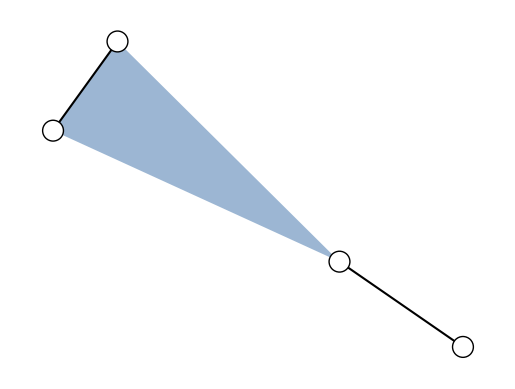

In [14]:
xgi.draw(H)

In [19]:
S = xgi.SimplicialComplex()

S.add_nodes_from(range(1, 5))
S.add_simplices_from(edges)

In [20]:
S.nodes

NodeView((1, 2, 3, 4))

In [22]:
S.edges.members()

[frozenset({1, 2}),
 frozenset({1, 2, 4}),
 frozenset({3, 4}),
 frozenset({2, 4}),
 frozenset({1, 4})]

In [25]:
H.edges.members()

[{1, 2}, {1, 2, 4}, {3, 4}]

In [27]:
H.nodes.memberships()

{1: {0, 1}, 2: {0, 1}, 3: {2}, 4: {1, 2}}

<Axes: >

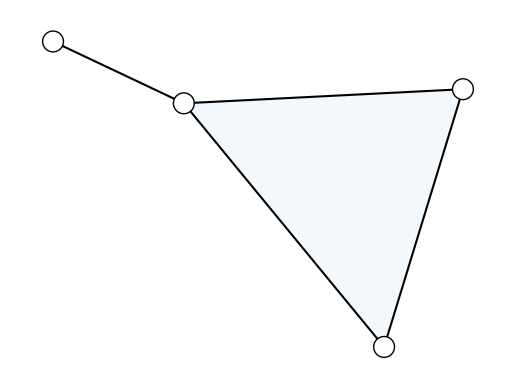

In [23]:
xgi.draw(S)

In [15]:
H_build = xgi.Hypergraph()
H_build.add_edge([1, 2], id="a")
H_build.add_node(0)
H_build.add_edges_from([[3, 4], [0, 2, 3]])
H_build.add_nodes_from([9, 10])

XGI automatically assigns unique edge IDs (if a user doesn't specify the ID)

In [16]:
H_build.edges

EdgeView(('a', 0, 1))

Why NodeViews and EdgeViews? These allow users to access many different properties and data structures from nodes and edges in a much simpler way. We will cover this more in depth later. For now, we can get the edges of which each node is a part and the nodes in each edge as follows:

In [5]:
print(H_build.nodes.memberships())
print(H_build.edges.members())
print(H_build.nodes.memberships(2))
print(H_build.edges.members("a"))

{1: {'a'}, 2: {1, 'a'}, 0: {1}, 3: {0, 1}, 4: {0}, 9: set(), 10: set()}
[{1, 2}, {3, 4}, {0, 2, 3}]
{1, 'a'}
{1, 2}


#### Loading datasets

Moving on to method 2, one can load datasets in several different ways. First, we provide a companion data repository, [xgi-data](https://gitlab.com/complexgroupinteractions/xgi-data), where users can easily load several datasets in standard format:

In [28]:
H_enron = xgi.load_xgi_data("email-enron")

In [29]:
print(H_enron)

Hypergraph named email-Enron with 148 nodes and 10885 hyperedges


In [33]:
H_enron.edges

EdgeView(('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '

In [40]:
H_enron.edges.filterby("order", 2).members()

[{'140', '23', '8'},
 {'140', '61', '63'},
 {'116', '125', '20'},
 {'29', '41', '51'},
 {'116', '125', '20'},
 {'6', '65', '70'},
 {'133', '41', '62'},
 {'138', '146', '68'},
 {'125', '20', '44'},
 {'17', '33', '46'},
 {'108', '125', '44'},
 {'116', '125', '20'},
 {'115', '23', '63'},
 {'140', '23', '43'},
 {'116', '125', '20'},
 {'116', '125', '20'},
 {'112', '6', '65'},
 {'107', '51', '84'},
 {'108', '24', '43'},
 {'147', '55', '61'},
 {'1', '41', '51'},
 {'116', '125', '20'},
 {'116', '125', '20'},
 {'142', '71', '86'},
 {'114', '47', '86'},
 {'116', '125', '20'},
 {'116', '125', '20'},
 {'45', '69', '96'},
 {'114', '47', '5'},
 {'104', '25', '73'},
 {'36', '46', '52'},
 {'25', '47', '55'},
 {'116', '125', '20'},
 {'2', '55', '95'},
 {'104', '25', '55'},
 {'147', '55', '61'},
 {'117', '66', '85'},
 {'23', '63', '8'},
 {'138', '27', '68'},
 {'117', '61', '63'},
 {'138', '45', '53'},
 {'116', '125', '20'},
 {'125', '23', '93'},
 {'25', '47', '55'},
 {'6', '65', '70'},
 {'112', '6', '6

In [42]:
xgi.load_xgi_data("contact-high-school")

This dataset, for example, has a corresponding [datasheet](https://gitlab.com/complexgroupinteractions/xgi-data-email-enron/-/blob/main/README.md) explaining its characteristics. The nodes (individuals) in this dataset contain associated email addresses and the edges (emails) contain associated timestamps. These attributes can be accessed by simply typing `H.nodes[id]` or `H.edges[id]` respectively.

In [7]:
print(f"The hypergraph has {H_enron.num_nodes} nodes and {H_enron.num_edges} edges")

# We can also print a summary of the hypergraph
print(H_enron)

The hypergraph has 148 nodes and 10885 edges
Hypergraph named email-Enron with 148 nodes and 10885 hyperedges


In [43]:
print("The first 10 node IDs are:")
print(list(H_enron.nodes)[:10])
print("\nThe first 10 edge IDs are:")
print(list(H_enron.edges)[:10])
print("\nThe attributes of node '4' are")
print(H_enron.nodes["4"])
print("\nThe attributes of edge '6' are")
print(H_enron.edges["6"])

The first 10 node IDs are:
['4', '1', '117', '129', '51', '41', '65', '107', '122', '29']

The first 10 edge IDs are:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

The attributes of node '4' are
{'name': 'robert.badeer@enron.com'}

The attributes of edge '6' are
{'timestamp': '2000-02-22T08:07:00'}


We can clean up this dataset to remove isolates, multi-edges, singletons, and to replace all IDs with integer IDs.

In [81]:
H_enron_cleaned = H_enron.cleanup(
    multiedges=False, singletons=False, isolates=False, relabel=True, in_place=False
)

print(H_enron_cleaned)

print("The first 10 node IDs are:")
print(list(H_enron_cleaned.nodes)[:10])

Hypergraph named email-Enron with 143 nodes and 1514 hyperedges
The first 10 node IDs are:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


#### Random null models

Lastly, we can create  synthetic hypergraphs using random generative models. For example, we can extract the degree and edge size sequence from this dataset and wire them together at random (according to the Chung-Lu model) to create a random null model:

In [55]:
N = 10
ps = [0.5, 0.02]
H = xgi.random_hypergraph(N, ps, seed=1)

In [74]:
pos = xgi.barycenter_spring_layout(H, seed=1)
#pos = xgi.random_layout(H, seed=1)

<Axes: >

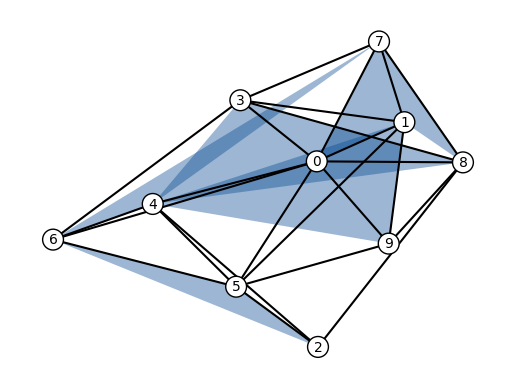

In [75]:
xgi.draw(H, node_labels=True, hyperedge_labels=False, pos=pos)

We check whether this new hypergraph is connected and if not, the sizes of the connected components:

In [79]:
list(xgi.connected_components(H_random))

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}]

In [80]:
H_random = H

connected = xgi.is_connected(H_random)
if not connected:
    size, num = np.unique(
        [len(cc) for cc in xgi.connected_components(H_random)], return_counts=True
    )
    print(size)
    print(num)
    print("The connected components:")
    #display(pd.DataFrame([size, num], columns=["Component size", "Number"]))

### Converting between different representations

#### Incidence matrix

Any hypergraph can be expressed as an $N \times M$ incidence matrix, $I$, where $N$ is the number of nodes and $M$ is the number of edges. Rows indicate the node ID and the columns indicate the edge ID. $I_{i,j}=1$ if node $i$ is a member of edge $j$ and zero otherwise.

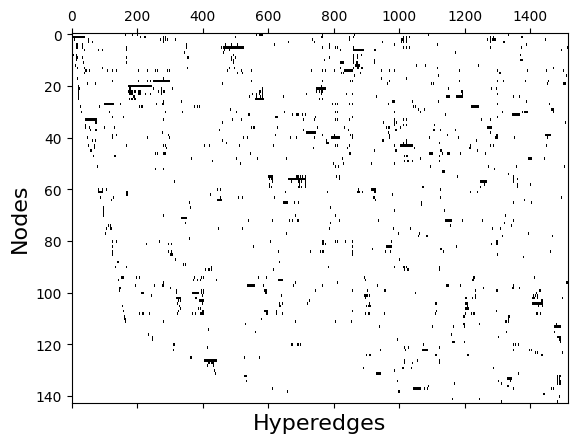

In [82]:
I = xgi.incidence_matrix(H_enron_cleaned, sparse=False)
plt.spy(I, aspect="auto")
plt.xlabel("Hyperedges", fontsize=16)
plt.ylabel("Nodes", fontsize=16)
plt.show()

#### Adjacency matrix

We can represent a hypergraph with an $N\times N$ adjacency matrix, $A$, where $N$ is the number of nodes. The adjacency matrix is a lossy format; different hypergraphs can create the same adjacency matrix. $A_{i,j} = 1$ if there is at least one hyperedge containing both nodes $i$ and $j$.

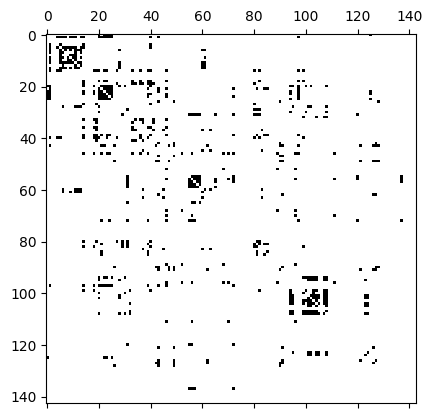

In [87]:
A = xgi.adjacency_matrix(H_enron_cleaned, sparse=False, order=4)
plt.spy(A)

In [94]:
orders = np.array(xgi.unique_edge_sizes(H_enron_cleaned)) - 1
weights = np.ones_like(orders)

In [98]:
xgi.multiorder_laplacian(H_enron_cleaned, weights, orders)

array([[172.34239802, -17.2342398 ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [-17.2342398 , 517.02719407, -17.2342398 , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , -17.2342398 , 413.62175525, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  34.4684796 ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
         68.93695921,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,  51.70271941]])

We can do much more such as computing different properties, reading/writing, converting to/from different data structures, hypergraph null models and much more!

See the Read The Docs for more information: https://xgi.readthedocs.io

### Visualization

The first step for drawing a hypergraph is to choose a layout for the nodes. At the moment the available layouts are:
* ```random_layout```: positions nodes uniformly at random in the unit square.
* ```pairwise_spring_layout```: positions the nodes using the Fruchterman-Reingold force-directed algorithm on the projected graph.
* ```barycenter_spring_layout``` and ```weighted_barycenter_spring_layout```: slight modification of ```pairwise_spring_layout```
    
Each layout returns a dictionary that maps nodes ID into (x, y) coordinates.

In [17]:
seed = 0
H_viz = xgi.random_hypergraph(20, [0.08, 0.01, 0.001], seed=seed)
pos1 = xgi.random_layout(H_viz)
pos2 = xgi.pairwise_spring_layout(H_viz)
pos3 = xgi.barycenter_spring_layout(H_viz)
pos4 = xgi.weighted_barycenter_spring_layout(H_viz)

<AxesSubplot: >

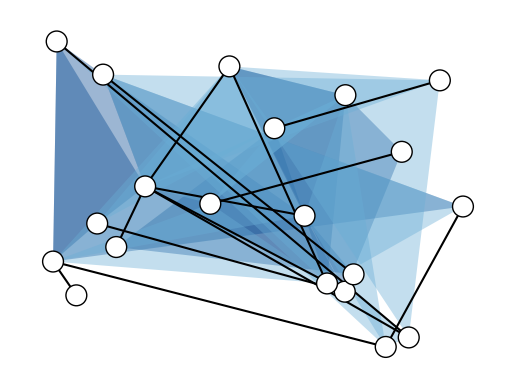

In [18]:
xgi.draw(H_viz, pos1)

We can easily add labels to the nodes to more easily compare the visualization to the hypergraph:

<AxesSubplot: >

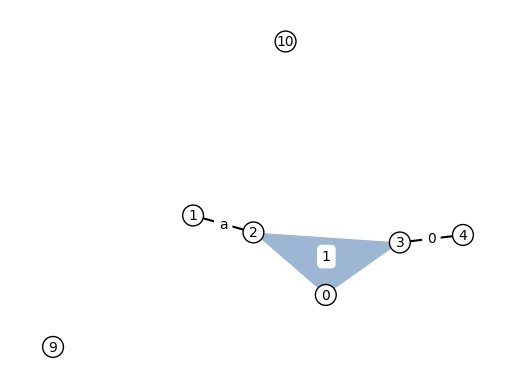

In [19]:
xgi.draw(H_build, node_labels=True, hyperedge_labels=True)

**Colors of the hyperedges** are designed to match the hyperedge size, but the colormap can be tweaked:

<AxesSubplot: >

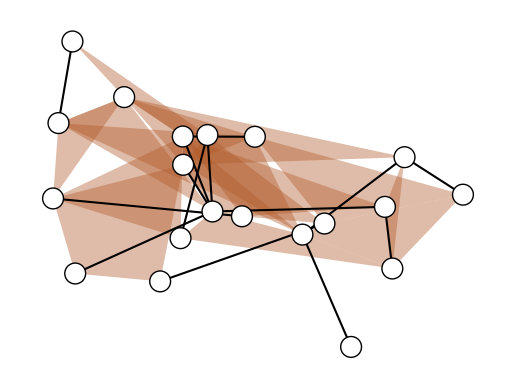

In [20]:
# Sequential colormap
cmap = cm.Paired

xgi.draw(H_viz, pos4, edge_fc_cmap=cmap)

Other parameters can be changed as well:

<AxesSubplot: >

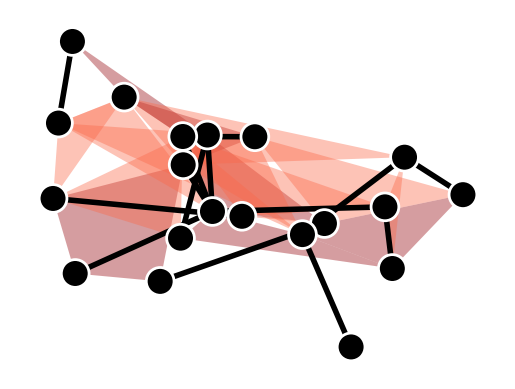

In [21]:
cmap = cm.Reds
dyad_lc = "gray"
dyad_lw = 4
node_fc = "black"
node_ec = "white"
node_lw = 2
node_size = 20

xgi.draw(
    H_viz,
    pos4,
    edge_fc_cmap=cmap,
    dyad_lc=dyad_lc,
    dyad_lw=dyad_lw,
    node_fc=node_fc,
    node_ec=node_ec,
    node_lw=node_lw,
    node_size=node_size,
)

Simplicial complexes can be visualized using the same functions for node layout and drawing.

#### Technical note
By definition, a simplicial complex object contains all sub-simplices. This would make the visualization heavy since all sub-simplices contained in a maximal simplex would overlap. The automatic solution for this, implemented by default in all the layouts, is to convert the simplicial complex into a hypergraph composed by solely by its maximal simplices.

#### Visual note
To visually distinguish simplicial complexes from hypergraphs, the ```draw``` function will also show all links contained in each maximal simplices (while omitting simplices of intermediate orders). 

<AxesSubplot: >

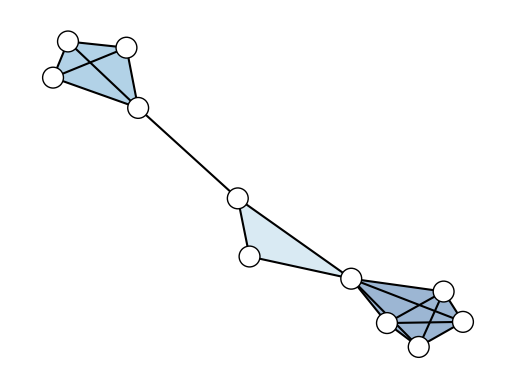

In [22]:
SC = xgi.SimplicialComplex()
SC.add_simplices_from([[3, 4, 5], [3, 6], [6, 7, 8, 9], [1, 4, 10, 11, 12], [1, 4]])

pos = xgi.pairwise_spring_layout(SC)
xgi.draw(SC, pos)

We can even color/draw the nodes and edges based on statistics!

In [23]:
n = 100
is_connected = False
while not is_connected:
    H = xgi.random_hypergraph(n, [0.03, 0.0002, 0.00001])
    is_connected = xgi.is_connected(H)
pos = xgi.barycenter_spring_layout(H)

In [102]:
H.nodes.degree.asdict()

{0: 9, 1: 8, 2: 4, 3: 6, 4: 7, 5: 7, 6: 6, 7: 7, 8: 7, 9: 5}

<AxesSubplot: >

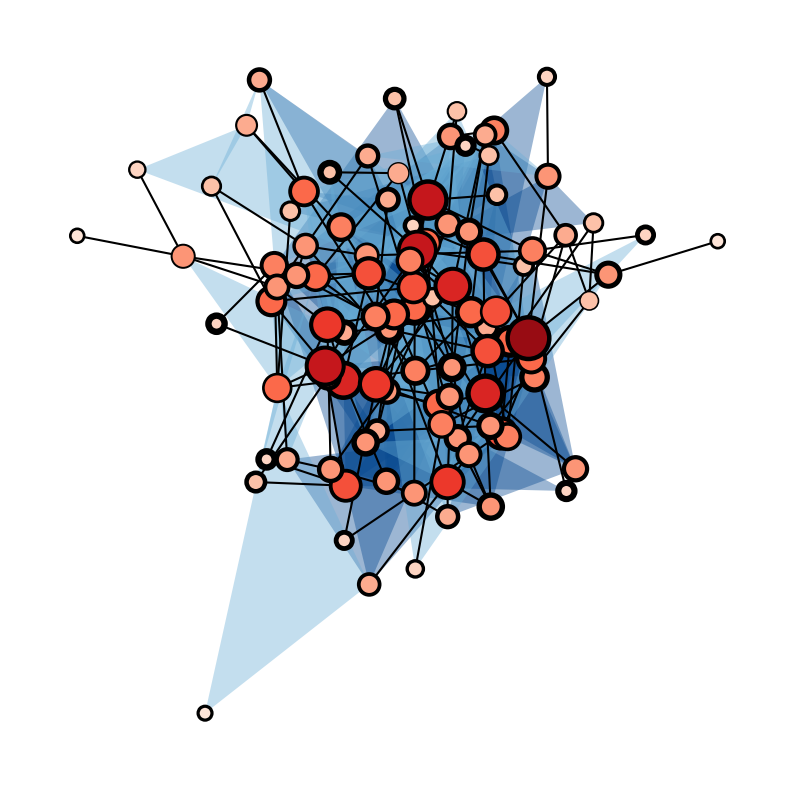

In [24]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
xgi.draw(
    H,
    pos,
    node_size=H.nodes.degree,
    node_lw=H.nodes.average_neighbor_degree,
    node_fc=H.nodes.degree,
    ax=ax,
)

### The stats package

The stats package is one of the features that sets `xgi` apart from other libraries.  It
provides a common interface to all statistics that can be computed from a network, its
nodes, or edges.

Consider the degree of the nodes of a hypergraph `H`.  After computing the values of the
degrees, one may wish to store them in a dict, a list, an array, a dataframe, etc.
Through the stats package, `xgi` provides a simple interface that seamlessly allows for
this type conversion.  This is done via the `NodeStat` class.

In [25]:
import xgi
import numpy as np
import pandas as pd

H_stats = xgi.Hypergraph([[1, 2, 3], [2, 3, 4, 5], [3, 4, 5]])
H_stats.degree()

{1: 1, 2: 2, 3: 3, 4: 2, 5: 2}

In [26]:
H_stats.nodes.degree

NodeStat('degree')

This `NodeStat` object allows us to choose the datatype, specify keywords, and get basic statistics from these properties

In [27]:
print("As a dictionary:")
print(H_stats.nodes.degree.asdict())
print("\nAs a list:")
print(H_stats.nodes.degree.aslist())
print("\nAs a numpy array:")
print(H_stats.nodes.degree.asnumpy())
print("\nAs a pandas dataframe:")
print(H_stats.nodes.degree.aspandas())

As a dictionary:
{1: 1, 2: 2, 3: 3, 4: 2, 5: 2}

As a list:
[1, 2, 3, 2, 2]

As a numpy array:
[1 2 3 2 2]

As a pandas dataframe:
1    1
2    2
3    3
4    2
5    2
Name: degree, dtype: int64


<AxesSubplot: >

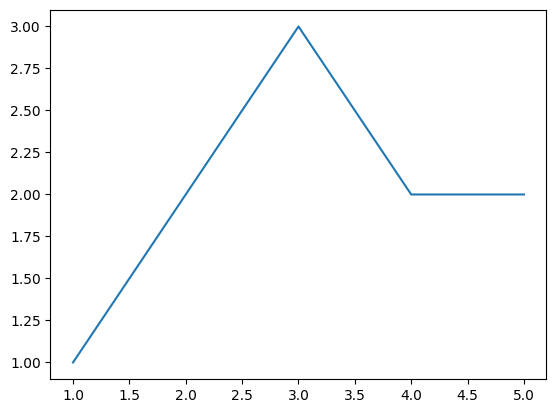

In [28]:
H_stats.nodes.degree.aspandas().plot()

In [29]:
print(H_stats.nodes.degree(order=2).asdict())

{1: 1, 2: 1, 3: 2, 4: 1, 5: 1}


In [30]:
st = H_stats.nodes.degree
np.round([st.max(), st.min(), st.mean(), st.median(), st.var(), st.std()], 3)

array([3.   , 1.   , 2.   , 2.   , 0.4  , 0.632])

Likewise, for edges,

In [31]:
st = H_stats.edges.size
st

EdgeStat('size')

In [32]:
np.round([st.max(), st.min(), st.mean(), st.median(), st.var(), st.std()], 3)

array([4.   , 3.   , 3.333, 3.   , 0.222, 0.471])

The interface for attributes is very similar. If we add nodal attributes, for example

In [33]:
H_stats.add_nodes_from(
    [
        (1, {"color": "red", "name": "horse"}),
        (2, {"color": "blue", "name": "pony"}),
        (3, {"color": "yellow", "name": "zebra"}),
        (4, {"color": "red", "name": "orangutan", "age": 20}),
        (5, {"color": "blue", "name": "fish", "age": 2}),
    ]
)
print(H_stats.nodes.attrs("color").asdict())

{1: 'red', 2: 'blue', 3: 'yellow', 4: 'red', 5: 'blue'}


In [34]:
print(H_stats.nodes.attrs[1])

{'color': 'red', 'name': 'horse'}


One can also filter nodes and edges by their attributes as well as any associated statistic. For example,

In [35]:
print(H_stats.nodes.filterby("degree", 2))
print(H_stats.nodes.filterby_attr("color", "blue"))

[2, 4, 5]
[2, 5]


In [36]:
H_stats.edges.filterby("size", 3).members()

[{1, 2, 3}, {3, 4, 5}]

In [37]:
H_stats.nodes.multi(["degree", "clustering_coefficient"]).aspandas().groupby(
    "degree"
).agg("mean")

,clustering_coefficient
degree,
1,1.000000
2,0.888889
3,0.666667


<AxesSubplot: xlabel='degree'>

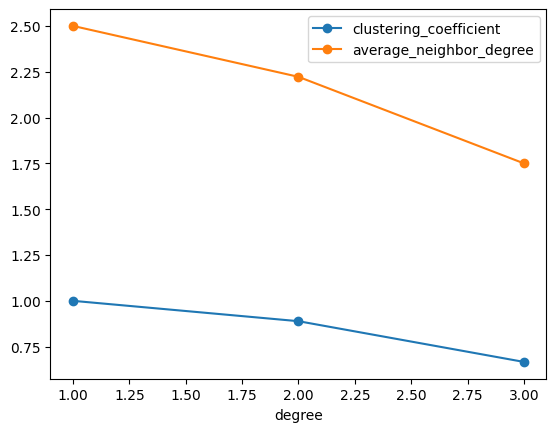

In [38]:
(
    H_stats.nodes.multi(["degree", "clustering_coefficient", "average_neighbor_degree"])
    .aspandas()
    .groupby("degree")
    .agg("mean")
    .plot(marker="o")
)

For even more functionality, see the Read The Docs: https://xgi.readthedocs.io

From this plot we can see that the original dataset is more assortative than the random null model.

### Dynamics

We can also simulate the order parameter of the Kuramoto model for hypergraphs.

In [110]:
n = 100
H = xgi.random_hypergraph(n, [0.05, 0.001], seed=None)
omega = np.random.normal(0, 0.05, n)
theta = np.linspace(0, 2 * np.pi, n)
timesteps = 1000
dt = 0.01

theta, t = xgi.simulate_kuramoto(
    H, k2=2, k3=3, omega=omega, theta=theta, timesteps=timesteps, dt=dt
)
R = xgi.compute_kuramoto_order_parameter(theta)

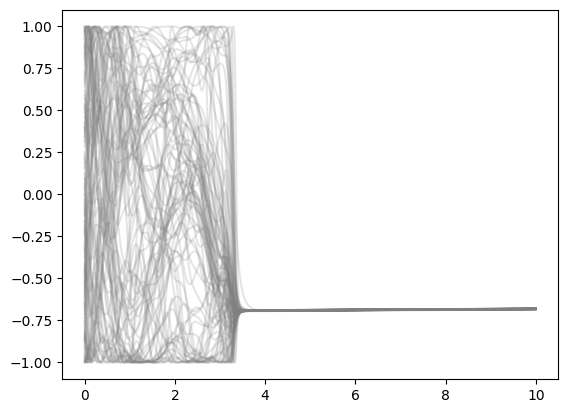

In [111]:
plt.plot(t, np.sin(theta), c="grey", alpha=0.2)

plt.show()

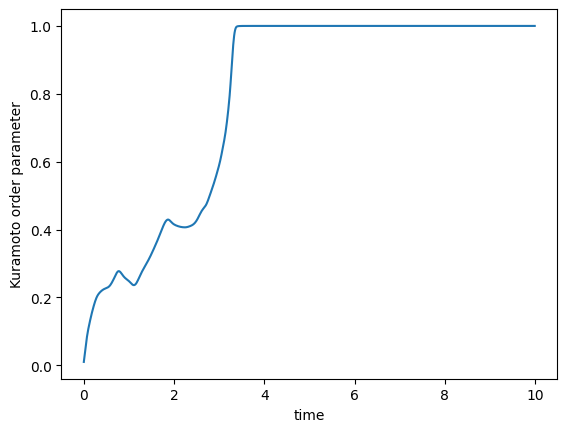

In [112]:
plt.figure()
plt.plot(t, R)
plt.xlabel("time")
plt.ylabel("Kuramoto order parameter")
plt.show()

**For more details, visit https://xgi.readthedocs.io**